## Bloby output without any modification to Sri's code

The following notebook computes precision and recall on two-photon microscopy images of mouse cerebral cortex. No modifications, such as thresholding intensity values between classes or putting bounds on size of noise, were performed.  

In [1]:
%matplotlib inline


In [2]:
import sys
print(sys.executable) ##to make sure running in correct env

/Users/drishtimannan/anaconda3/envs/bloby2/bin/python


/Users/drishtimannan/anaconda3/envs/bloby2/lib/python3.6/site-packages/tifffile/tifffile.py:7685: UserWarning: No module named 'tifffile._tifffile'
  Functionality might be degraded or be slow.

  warnings.warn('%s%s' % (e, warn))


Initialization 0
  Iteration 0	 time lapse 0.13948s	 ll change inf
  Iteration 10	 time lapse 0.23682s	 ll change 0.07718
Initialization converged: True	 time lapse 0.60537s	 ll -5.97294
Precision: 0.475
Recall: 0.73


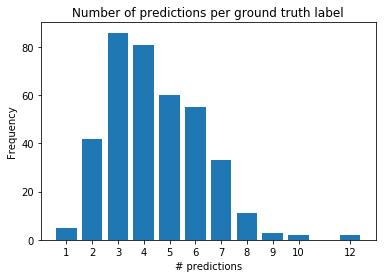

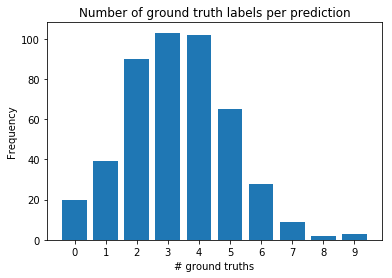

In [3]:
from bloby.BlobDetector import BlobDetector
from bloby.BlobMetrics import BlobMetrics
from bloby import util

input_tif_path = 'sample.tif' 
output_csv_path = 'sample_out.csv'
detector = BlobDetector(input_tif_path, n_components = 3)
centroids = detector.get_blob_centroids()
util.write_list_to_csv(centroids, output_csv_path)

ground_truth_path = 'sample.csv'
ground_truth = util.get_list_from_csv(ground_truth_path)
metrics = BlobMetrics(ground_truth, centroids)
print('Precision: {}\nRecall: {}'.format(metrics.precision(), metrics.recall()))

metrics.plot_predictions_per_ground_truth()
metrics.plot_ground_truths_per_prediction()